In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split

In [4]:
from string import digits
#reducing features using pca
#load the data
digits = datasets.load_digits()
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [5]:
#standardize the feature
scaler = StandardScaler()
scaler.fit(digits.data)
scaled_data = scaler.transform(digits.data)
scaled_data

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

In [7]:
#create a pca that will retain 99% of variance
pca = PCA(0.99, whiten=True)
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)
pca_data

array([[-0.70631939, -0.39512814, -1.73816236, ..., -0.36526417,
        -0.31369006,  0.05355504],
       [-0.21732591,  0.38276482,  1.72878893, ...,  0.17818068,
        -0.14031747,  1.18179755],
       [-0.4804351 , -0.13130437,  1.33172761, ...,  0.01924571,
        -0.23580029,  0.92966158],
       ...,
       [-0.37732433, -0.0612296 ,  1.0879821 , ...,  1.05526847,
         1.75559618, -0.87894699],
       [-0.39705007, -0.15768102, -1.08160094, ..., -0.10442881,
         0.65907949,  1.1292155 ],
       [ 0.46407544, -0.92213976,  0.12493334, ...,  1.10593026,
         0.54434185, -0.26573597]])

In [8]:
#show result
print(pca.explained_variance_ratio_)
print(pca.n_components_)
print(pca.explained_variance_)

[0.12033916 0.09561054 0.08444415 0.06498408 0.04860155 0.0421412
 0.03942083 0.03389381 0.02998221 0.02932003 0.02781805 0.02577055
 0.02275303 0.0222718  0.02165229 0.01914167 0.01775547 0.01638069
 0.0159646  0.01489191 0.0134797  0.01271931 0.01165837 0.01057647
 0.00975316 0.00944559 0.00863014 0.00836643 0.00797693 0.00746471
 0.00725582 0.00691911 0.00653909 0.00640793 0.00591384 0.00571162
 0.00523637 0.00481808 0.00453719 0.00423163 0.00406053 0.00397085
 0.00356493 0.00340787 0.00327835 0.00311032 0.00288575 0.00276489
 0.00259175 0.00234483 0.00218257 0.00203598 0.00195512 0.00183318]
54
[7.34477606 5.83549054 5.15396118 3.96623597 2.9663452  2.57204442
 2.40600941 2.06867355 1.82993314 1.78951739 1.69784616 1.57287889
 1.38870781 1.35933609 1.32152536 1.16829176 1.08368678 0.99977862
 0.97438293 0.90891242 0.82271926 0.77631014 0.71155675 0.64552365
 0.59527399 0.5765018  0.52673155 0.5106363  0.48686381 0.45560107
 0.44285155 0.42230086 0.3991063  0.39110111 0.36094517 0.3

In [10]:
print(pca_data.shape)

(1797, 54)


In [11]:
print("reduced number of feature ", pca_data.shape[1])

reduced number of feature  54


In [12]:
print("original number of feature ", digits.data.shape[1])

original number of feature  64


In [13]:
#reducing feature when data is linearly inseparble
from sklearn.decomposition import PCA, KernelPCA
from sklearn.datasets import make_circles

In [14]:
#create linearlyinseparable data
features, _ = make_circles(n_samples=1000, random_state=1, noise=0.1, factor=0.1)
features

array([[ 0.23058395, -0.10671314],
       [-0.0834218 , -0.22647078],
       [ 0.9246533 , -0.71492522],
       ...,
       [ 0.02517206,  0.00964548],
       [-0.92836187,  0.06693357],
       [ 1.03502248,  0.54878286]])

In [15]:
#apply kernel pca with radius basis funcation (RBF) kernel
kpca = KernelPCA(kernel="rbf", gamma=15, n_components=1)
kpca.fit_transform(features)
features_kpca = kpca.transform(features)
print("original number of feature ", features.shape[1])
print("reduced number of feature ", features_kpca.shape[1])


original number of feature  2
reduced number of feature  1


In [16]:
print(features_kpca)

[[ 0.08961469]
 [ 0.17082614]
 [-0.36539792]
 [-0.37995615]
 [-0.37090715]
 [ 0.6078442 ]
 [-0.39356042]
 [ 0.55552131]
 [-0.39706997]
 [-0.38733386]
 [-0.37948734]
 [-0.37769023]
 [ 0.25455601]
 [-0.39039716]
 [ 0.39742368]
 [-0.37364706]
 [-0.3825536 ]
 [-0.37354648]
 [ 0.30693009]
 [-0.35443587]
 [ 0.26674653]
 [-0.38636934]
 [ 0.04754015]
 [ 0.29861968]
 [-0.38880508]
 [-0.36940646]
 [-0.38214762]
 [ 0.48848943]
 [ 0.53117546]
 [-0.38704399]
 [ 0.53090804]
 [ 0.41694266]
 [ 0.58921096]
 [-0.3696242 ]
 [-0.36469789]
 [-0.40218195]
 [-0.38201905]
 [ 0.59934002]
 [ 0.42779961]
 [ 0.42940318]
 [ 0.10084162]
 [ 0.22657993]
 [-0.38500742]
 [-0.37931649]
 [-0.38076893]
 [ 0.60340158]
 [ 0.12280673]
 [-0.38757955]
 [-0.37711105]
 [ 0.4314274 ]
 [ 0.46054872]
 [-0.36716903]
 [ 0.08416134]
 [-0.38134059]
 [-0.3861307 ]
 [-0.38427341]
 [-0.14005453]
 [ 0.53419069]
 [-0.37436415]
 [ 0.20594719]
 [-0.38418216]
 [-0.34668156]
 [-0.37892776]
 [ 0.32750463]
 [ 0.55577819]
 [ 0.60181755]
 [-0.37637

In [17]:
#reducing features by maximizing class separability
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


In [19]:
#load the data
iris = datasets.load_iris()
features = iris.data
target = iris.target
print("target labels ", np.unique(target))


target labels  [0 1 2]


In [20]:
#create the lda
lda = LinearDiscriminantAnalysis(n_components=1)
features_lda = lda.fit(features, target).transform(features)
print("original number of feature ", features.shape[1])
print("reduced number of feature ", features_lda.shape[1])
print("lda ratio ", lda.explained_variance_ratio_)

original number of feature  4
reduced number of feature  1
lda ratio  [0.9912126]


In [21]:
#create and run LDa
lda = LinearDiscriminantAnalysis(n_components=None)
features_lda = lda.fit(features, target)
print("lda ratio ", features_lda.explained_variance_ratio_)

lda ratio  [0.9912126 0.0087874]


In [23]:
#create array of explained variance ratios
lda_var_ratios = lda.explained_variance_ratio_
def select_n_components(var_ratio, goal_var: float) -> int:
    total_variance = 0.0
    n_components = 0
    for explained_variance in var_ratio:
        total_variance += explained_variance
        n_components += 1
        if total_variance >= goal_var:
            break
    return n_components
select_n_components(lda_var_ratios, 0.95)

1

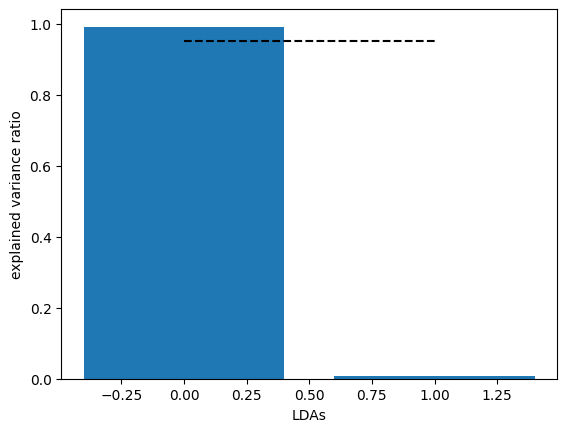

In [25]:
#plot
plt.bar([x for x in range(len(lda_var_ratios))], lda_var_ratios)
# Adjust the x-axis range to match the length of lda_var_ratios
plt.plot([0, len(lda_var_ratios) -1], [0.95, 0.95], 'k--')
# Update the x-coordinates for the dashed line
plt.xlabel("LDAs")
plt.ylabel("explained variance ratio")
plt.show()

lda ratio  [0.9912126 0.0087874]


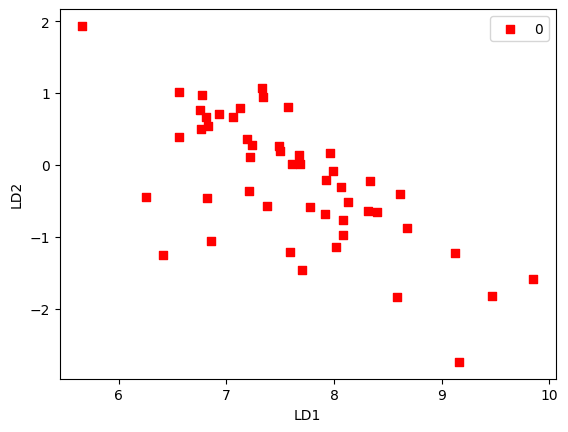

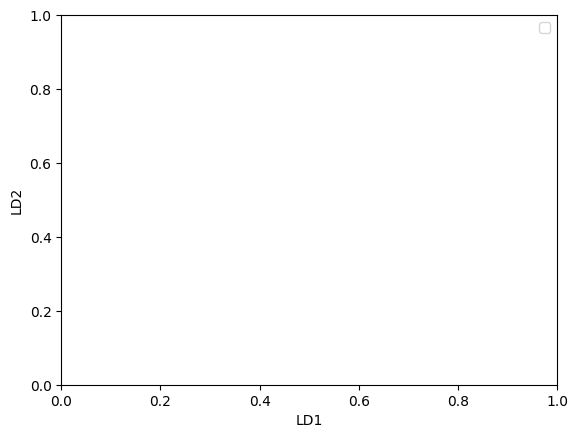

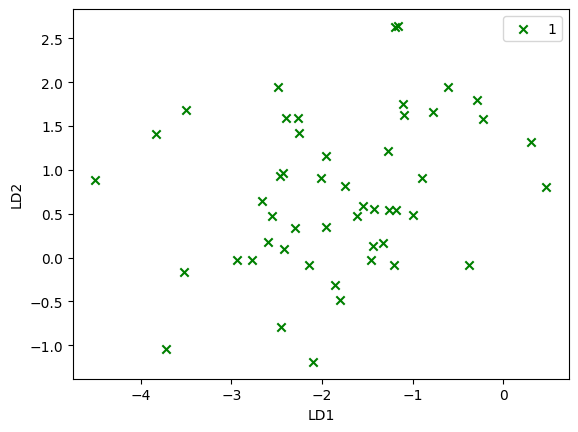

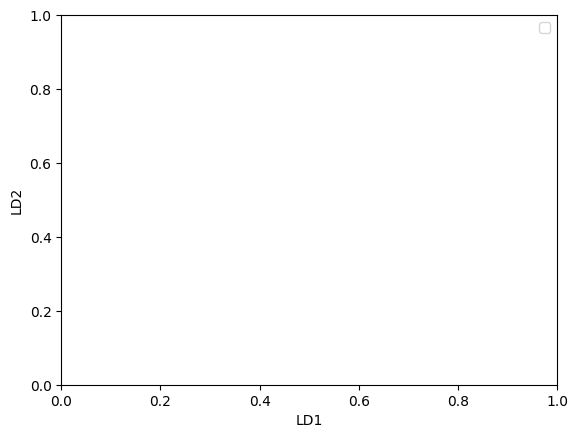

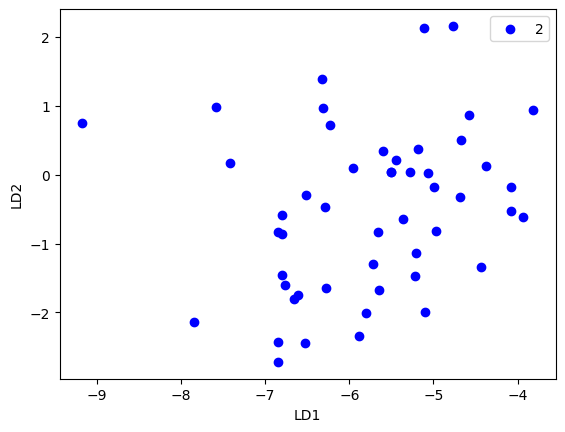

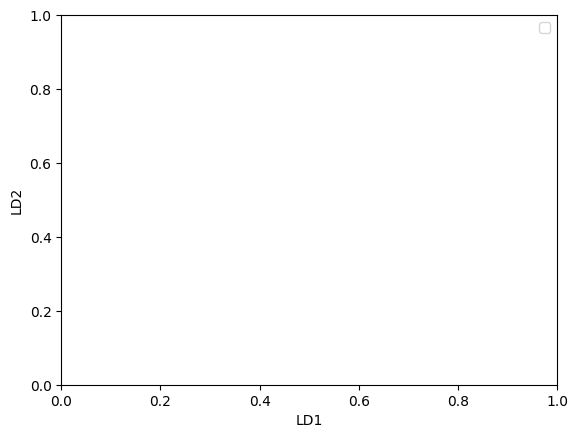

In [29]:
#create and run LDa
lda = LinearDiscriminantAnalysis(n_components=None)
features_lda_model = lda.fit(features, target) # Assign the fitted model to a different variable
print("lda ratio ", features_lda_model.explained_variance_ratio_)

# ... (rest of your code) ...

# In cell 28 (or wherever you are scattering the data)
#scatter
import numpy as np
colors = ["r", "g", "b"]
markers = ["s", "x", "o"]

# Transform the features to get the reduced dimensionality data
features_lda_transformed = features_lda_model.transform(features) # Transform using the fitted model

for l, c, m in zip(np.unique(target), colors, markers):
    # Use the transformed data for plotting
    plt.scatter(features_lda_transformed[target == l, 0], features_lda_transformed[target == l, 1], c=c, label=l, marker=m)
    plt.xlabel("LD1")
    plt.ylabel("LD2")
    plt.legend(loc="best")
    plt.show()

    plt.xlabel("LD1")
    plt.ylabel("LD2")
    plt.legend(loc="best")
    plt.show()

In [31]:
#reducing feature using matrix factorization
from sklearn.decomposition import NMF
from sklearn.preprocessing import normalize
import numpy as np
from sklearn import datasets

In [32]:
#load the dataset
digits = datasets.load_digits()
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [33]:
#load features matrix
features = digits.data
features

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [34]:
#creat fit and apply NMF
nmf = NMF(n_components=10, random_state=1)
features_nmf = nmf.fit_transform(features)
print("original number of feature ", features.shape[1])
print("reduced number of feature ", features_nmf.shape[1])

original number of feature  64
reduced number of feature  10


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


original number of feature  64
reduced number of feature  10


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


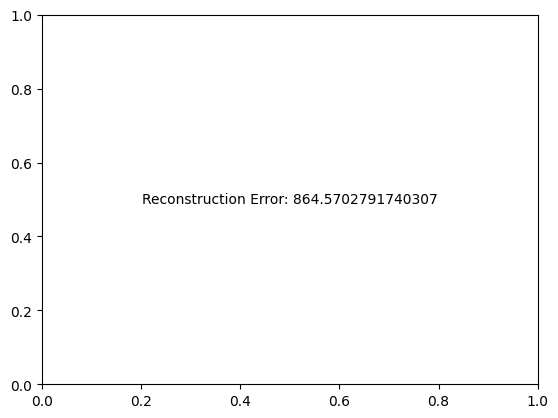

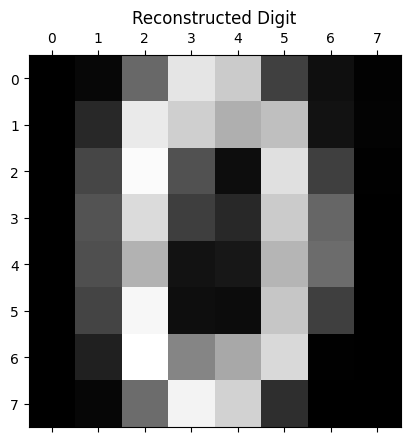

In [39]:
#reducing feature using matrix factorization
from sklearn.decomposition import NMF
from sklearn.preprocessing import normalize
import numpy as np
from sklearn import datasets

#load the dataset
digits = datasets.load_digits()

#load features matrix
features = digits.data

#creat fit and apply NMF, specifying 'frobenius' for beta_loss to calculate reconstruction_err_
nmf = NMF(n_components=10, random_state=1, beta_loss='frobenius') # Added beta_loss='frobenius'
features_nmf = nmf.fit_transform(features)
print("original number of feature ", features.shape[1])
print("reduced number of feature ", features_nmf.shape[1])

#plot
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import NMF
from sklearn import datasets
from sklearn.preprocessing import normalize
plt.gray()
# The reconstruction_err_ is a single number, representing the Frobenius norm of the difference
# between the original data and the reconstructed data.
# To visualize this, you could potentially display it as text,
# or create a simple plot with a single point.
# The following will display the error as text:
plt.text(0.5, 0.5, f"Reconstruction Error: {nmf.reconstruction_err_}",
         horizontalalignment='center', verticalalignment='center')
plt.show()

# If you want to visualize the actual reconstructed data,
# you can do something like this:
reconstructed_data = nmf.inverse_transform(features_nmf)
plt.matshow(reconstructed_data[0].reshape(8, 8)) # Assuming digits are 8x8
plt.title("Reconstructed Digit")
plt.show()

In [43]:
#reducing features on sparse data
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix
import numpy as np
digit=datasets.load_digits()
print(digit)

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]]), 'target': array([0, 1, 2, ..., 8, 9, 8]), 'frame': None, 'feature_names': ['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', '

In [44]:
#standardize feature matrix
features = StandardScaler().fit_transform(digit.data)
features

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

In [45]:
#make sparse matirx
features_sparse = csr_matrix(features)
features_sparse

<1797x64 sparse matrix of type '<class 'numpy.float64'>'
	with 109617 stored elements in Compressed Sparse Row format>

In [46]:
#create TSVD
tsvd = TruncatedSVD(n_components=10)
features_sparse_tsvd = tsvd.fit(features)
features_tsvd = features_sparse_tsvd.transform(features)
print("original number of feature ", features_sparse.shape[1])
print("reduced number of feature ", features_tsvd.shape[1])

original number of feature  64
reduced number of feature  10


<Figure size 640x480 with 0 Axes>

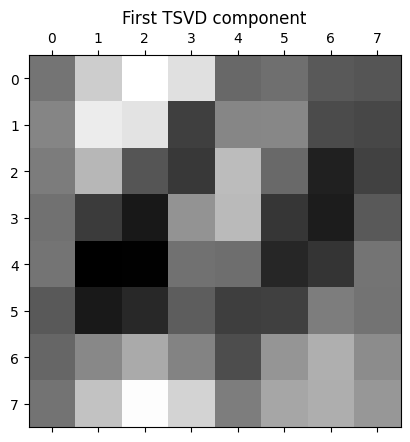

In [47]:
#plot
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from scipy.sparse import csr_matrix
plt.gray()
digits = datasets.load_digits()
images = digits.images
X = np.reshape(images, (len(images), -1))
X = StandardScaler().fit_transform(X)
tsvd = TruncatedSVD(n_components=10)
features_tsvd = tsvd.fit_transform(X)
plt.matshow(tsvd.components_[0].reshape(8, 8))
plt.title("First TSVD component")
plt.show()

In [48]:
#sum of first three components
tsvd.components_[0] + tsvd.components_[1] + tsvd.components_[2]


array([ 3.05011723e-17,  2.52850104e-01,  2.88633598e-01,  1.59103246e-01,
        6.36656489e-02,  1.73543887e-01,  1.59676343e-01,  6.05942681e-02,
        3.64927530e-02,  2.22511794e-01,  7.09194616e-02, -3.32197911e-02,
        1.62678508e-01,  7.28961831e-02,  1.10494365e-01,  1.02452970e-02,
        1.83154895e-02,  9.96092843e-03, -2.89276754e-01,  4.62417584e-03,
        3.48409138e-01, -4.97104005e-02, -1.67075858e-01, -4.97882863e-02,
        1.23150810e-02, -2.79390185e-01, -3.43817801e-01,  2.34394572e-01,
        3.87176131e-01, -1.88849417e-01, -2.86954857e-01, -3.82269760e-02,
        0.00000000e+00, -3.82572538e-01, -2.61780327e-01,  3.31281013e-01,
        3.50727033e-01, -3.60980840e-01, -4.29387722e-01,  0.00000000e+00,
       -6.46391910e-02, -2.84023519e-01, -2.55595175e-01,  2.85447420e-01,
        3.07038635e-01, -3.95751244e-01, -4.11634091e-01, -4.88542129e-02,
       -3.48340745e-02, -1.08878594e-02, -1.20500431e-01,  2.10935550e-01,
        1.13833987e-01, -

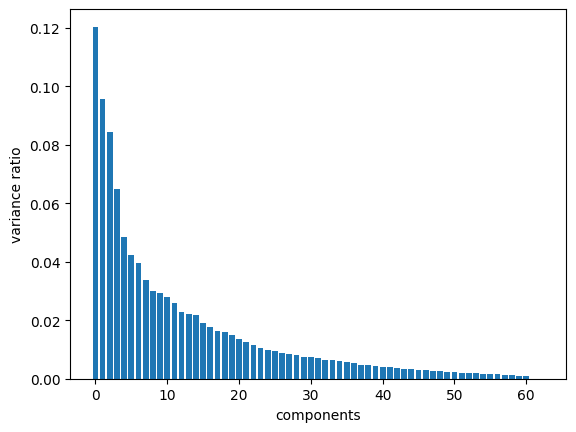

In [49]:
#create and run a TSVD with one less then anumber of featrues
tsvd = TruncatedSVD(n_components=features_sparse.shape[1]-1)
features_tsvd = tsvd.fit(features)
tsvd_var_ratios = tsvd.explained_variance_ratio_

#create a bar chart of the explained variance
plt.bar([x for x in range(len(tsvd_var_ratios))], tsvd_var_ratios)
plt.xlabel("components")
plt.ylabel("variance ratio")
plt.show()

In [52]:
#creat funcation
def select_n_components(var_ratio, goal_var):
    total_variance = 0.0
    n_components = 0
    for explained_variance in var_ratio:
        total_variance += explained_variance  # Change 'explained' to 'explained_variance'
        n_components += 1
        if total_variance >= goal_var:
            break
    return n_components
select_n_components(tsvd_var_ratios, 0.95)


40

<Figure size 640x480 with 0 Axes>

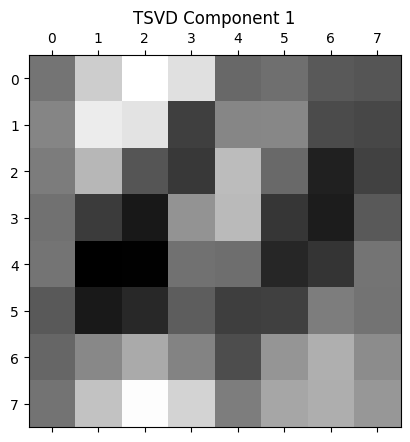

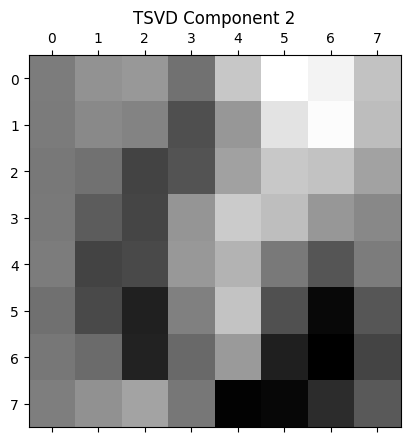

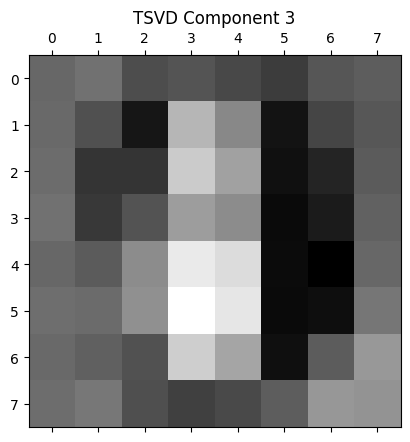

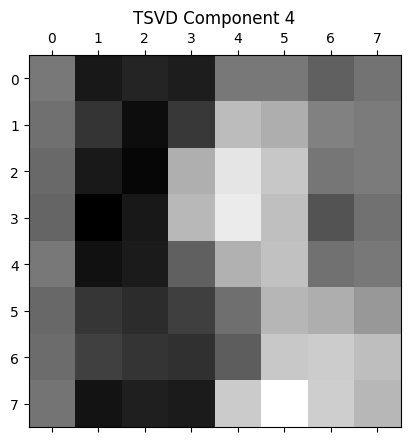

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

# Load the digits dataset
digits = datasets.load_digits()
images = digits.images

# Reshape the images into a 2D array (samples x features)
X = np.reshape(images, (len(images), -1))

# Standardize the features
X = StandardScaler().fit_transform(X)

# Apply Truncated SVD to reduce dimensionality to 10 components
tsvd = TruncatedSVD(n_components=10)
features_tsvd = tsvd.fit_transform(X)

# Set the colormap to grayscale
plt.gray()

# Plot the first four components as images
for i in range(4):
    plt.matshow(tsvd.components_[i].reshape(8, 8))  # Reshape component to 8x8 image
    plt.title(f"TSVD Component {i + 1}")  # Set title
    plt.show()  # Display the plot